# Lab 0 - Machine Learning basics

In this first notebook we will cover a few basic topics without really using any specific machine learning libraries.

Main concepts:

 * Dataset
 * Training
 * Basic plotting

## Imports and setup

The usual stuff:

 * Magic command `%matplotlib inline` so that plots are displayed correctly in the notebook.
 * `matplotlib` followed by `seaborn` in order to have fancy plots
 * `numpy` _et similia_ for number crunching.


In [1]:
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt

import seaborn

import numpy as np

from numpy.linalg import inv

## Dataset generation

We want to simulate a very simple dataset where samples consist of $(x_i, y_i)$ pairs with $x_i, y_i \in \mathbb{R}$, for $i = 1, \dots, n$.

We assume there is a _linear relatioship_ between $y$ and $x$ of the form $y = wx + c$. However, we want to simulate a certain amount of noise in the measurements, so each point will be generated first drawing $x_i$ from a uniform distribution and then computing the corresponding $y_i$ using the following rule: 

$$
y_i = wx_i + c + \epsilon,
$$

where $\epsilon \sim \mathcal{N}(0, \sigma^2)$

<img style="float: left;" src="warning.png" width="20px"> &nbsp; **Notation**: upper case letters such as $X$ are used to represent _matrices_ (although in the example it is a $10 \times 1$ matrix), lower case letters such as $y$ are used for _vectors_.

In [2]:
n = 10 # the number of samples

X = np.random.uniform(-1, 1, size=(n,1))

w = 1.3
c = 0.7

sigma = 0.3


y = w * X + c + np.random.normal(0, sigma**2, size=(n,1))


## Plotting

Since data points lie on a plane, we can visualize them.

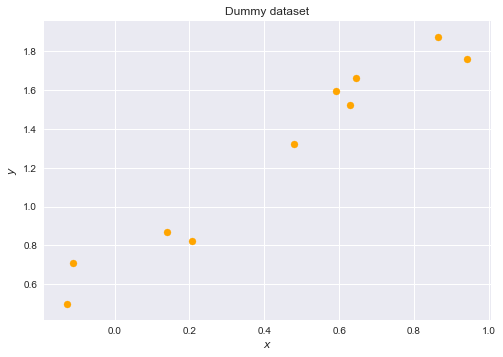

In [3]:
fig, ax = plt.subplots()

ax.set_title("Dummy dataset")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.scatter(X, y, c=["orange"]);

## Training a model

### Ordinary Least Squares (OLS)

Let's forget for a second about the coefficient $c$. We'll take into account it again later.

We want to try and recover the coefficient $m$; we do so by _minimizing_ a functional, which in this case consists exclusively of a _loss term_.

Such loss term represents the adherence (or, more precisely, the lack thereof) of the inferred model $f$ (which in this simple case simply consists of the angular coefficient $w$) to the available data. A common choice is to use the _square loss_.

$$
L_{f}(X, y) = \sum_{i=1}^n (f(x_i) - y_i)^2
$$

which in our simple case is

$$
L_{w}(X, y) = \sum_{i=1}^n (w x_i - y_i)^2
$$

In a more compact matrix notation (useful when $X$ is a generic $n \times d$ matrix)

$$
L_{{\bf w}}(X, {\bf y}) = \|X^T {\bf w} - {\bf y}\|_2^2
$$

To retrieve the $\hat{\bf w}$ that minimizes that functional, we simply differentiate $L_{{\bf w}}(X, {\bf y})$ with respect to ${\bf w}$ and set it to $0$.


\begin{align}
\frac {\partial L}{\partial {\bf w}} & = 0 \\
(X^T X) \hat{\bf w} -X^T {\bf y} & = 0 \\
(X^T X) \hat{\bf w} & = X^T {\bf y}
\end{align}

and therefore

$$
\hat{\bf w} = (X^T X)^{-1} X^T {\bf y}
$$

<img style="float: left;" src="info.png" width="20px"> &nbsp; **Useful `numpy` functions and methods:**

```python

# Transpose of a matrix
A.T

# Dot product. A and b can be any mix of matrices or vectors, 
# as long as they have the appropriate dimensions
A.dot(b)

# Matrix inversion (using function 'inv' from numpy.linalg)
inv(A)
```

In [4]:
### BEGIN STUDENTS

# w_hat = ...

w_hat = inv(X.T.dot(X)).dot(X.T).dot(y)
### END STUDENTS

Now let's plot the dataset and the fitted line

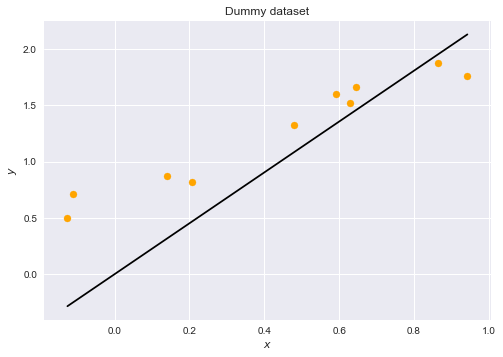

In [5]:
fig, ax = plt.subplots()

ax.set_title("Dummy dataset")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.scatter(X, y, c=["orange"]);

xmin = X.min()
xmax = X.max()

ymin = float(w_hat * xmin)
ymax = float(w_hat * xmax)

ax.plot([xmin, xmax], [ymin, ymax], 'k-');

It probably kinda sucks. While the _slope_ of the line is probably almost correct (it depends on how many samples you generated), it fails to be a good approximation.

This is due to the fact that while the _real_ model has an additional parameter $c$, the _intercept_, we did not include it in our model, which just consisted of the _slope_ $w$.

We'll get to it right now.

The simplest way to account for the intercept is to add an extra column to the data matrix $X$ where all entries are equal to $1$, and pretend it's just another _feature_ of our dataset. In facts, since each input is now a bidimensional vector ${\bf x}_i = [1, x_i]^T$, if we think our model as a bidimensional vector ${\bf w} = [c, w]^T$, then

$$
y_i = c + w x_i = {\bf w}^T {\bf x}_i
$$

In [6]:
### BEGIN STUDENTS ###

# X_ones= ...
# w_hat = ...

X_ones = np.hstack((np.ones(shape=(n,1)), X))

w_hat = inv(X_ones.T.dot(X_ones)).dot(X_ones.T).dot(y)
### END STUDENTS ###

Now let's plot it again

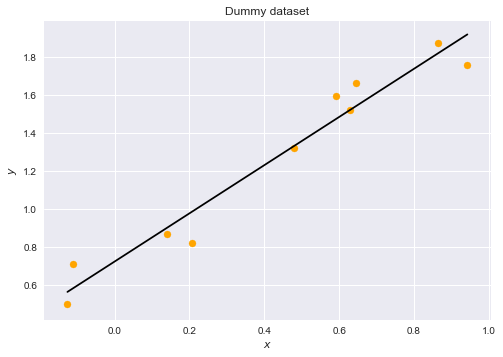

In [7]:
fig, ax = plt.subplots()

ax.set_title("Dummy dataset")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.scatter(X, y, c=["orange"]);

xmin = X.min()
xmax = X.max()

ymin = w_hat[1] * xmin + w_hat[0]
ymax = w_hat[1] * xmax + w_hat[0]

ax.plot([xmin, xmax], [ymin, ymax], 'k-');